In [1]:
# import libraries possible needed
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# import dataset
spotify_data = pd.read_csv('spotify_data.csv')
spotify_data

,artist_followers,genres,artist_name,artist_popularity,track_name,track_popularity,duration_ms,explicit,release_year,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,16996777,rap,Juice WRLD,96,All Girls Are The Same,0,165820,1,2021,0.673,...,0,-7.226,1,0.3060,0.0769,0.000338,0.0856,0.203,161.991,4
1,16996777,rap,Juice WRLD,96,Lucid Dreams,0,239836,1,2021,0.511,...,6,-7.230,0,0.2000,0.3490,0.000000,0.3400,0.218,83.903,4
2,16996777,rap,Juice WRLD,96,Hear Me Calling,0,189977,1,2021,0.699,...,7,-3.997,0,0.1060,0.3080,0.000036,0.1210,0.499,88.933,4
3,16996777,rap,Juice WRLD,96,Robbery,0,240527,1,2021,0.708,...,2,-5.181,1,0.0442,0.3480,0.000000,0.2220,0.543,79.993,4
4,5988689,rap,Roddy Ricch,88,Big Stepper,0,175170,0,2021,0.753,...,8,-8.469,1,0.2920,0.0477,0.000000,0.1970,0.616,76.997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243185,2256652,jazz,Louis Armstrong,74,Stardust,5,213667,0,1923,0.614,...,3,-11.004,0,0.0541,0.9700,0.646000,0.0514,0.772,122.319,4
243186,2256652,jazz,Louis Armstrong,74,Knockin' A Jug - 78 rpm Version,6,193760,0,1923,0.788,...,10,-14.032,1,0.3010,0.8820,0.844000,0.1240,0.676,113.336,4
243187,2256652,jazz,Louis Armstrong,74,When It's Sleepy Time Down South,4,200200,0,1923,0.527,...,3,-14.814,1,0.0793,0.9890,0.000010,0.1040,0.370,105.093,4
243188,2256652,jazz,Louis Armstrong,74,On The Sunny Side Of The Street - Part 2,4,185973,0,1923,0.559,...,0,-9.804,1,0.0512,0.9890,0.847000,0.4480,0.576,101.279,4


In [3]:
spotify_data.corr()

,artist_followers,artist_popularity,track_popularity,duration_ms,explicit,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
artist_followers,1.000000,0.577861,0.197426,0.040435,0.082857,0.098589,-0.010120,0.080085,-0.000119,0.123771,0.004313,-0.059933,-0.107475,-0.033986,0.002425,-0.053317,0.016524,0.030826
artist_popularity,0.577861,1.000000,0.285565,-0.097996,0.092147,0.062007,0.038784,0.039583,-0.011005,0.045165,0.018758,0.236942,-0.075715,-0.066679,0.099678,-0.034501,-0.032036,-0.033423
track_popularity,0.197426,0.285565,1.000000,0.060474,0.193685,0.568329,0.158507,0.217342,0.013369,0.296350,-0.022486,-0.056537,-0.284433,-0.124283,-0.090479,-0.038859,0.058408,0.071741
duration_ms,0.040435,-0.097996,0.060474,1.000000,-0.024226,0.067665,-0.145779,0.075990,0.007710,0.078586,-0.034818,-0.332585,-0.133960,0.067055,-0.034631,-0.155354,0.051046,0.085015
explicit,0.082857,0.092147,0.193685,-0.024226,1.000000,0.215656,0.138522,0.104734,0.011818,0.124410,-0.060350,0.077268,-0.129363,-0.039472,-0.024283,-0.032549,0.006585,0.043538
release_year,0.098589,0.062007,0.568329,0.067665,0.215656,1.000000,0.204743,0.338096,0.021497,0.430054,-0.071338,-0.032968,-0.369038,-0.149644,-0.045160,-0.070025,0.079382,0.089485
danceability,-0.010120,0.038784,0.158507,-0.145779,0.138522,0.204743,1.000000,0.137615,0.020128,0.142239,-0.051130,0.198509,-0.143936,-0.179213,-0.114999,0.505350,-0.125061,0.111015
energy,0.080085,0.039583,0.217342,0.075990,0.104734,0.338096,0.137615,1.000000,0.030824,0.747829,-0.053374,-0.043377,-0.678745,-0.131269,0.126050,0.348158,0.205960,0.170854
key,-0.000119,-0.011005,0.013369,0.007710,0.011818,0.021497,0.020128,0.030824,1.000000,0.024674,-0.139688,-0.003533,-0.023179,-0.006600,-0.011566,0.024206,0.008336,0.007738
loudness,0.123771,0.045165,0.296350,0.078586,0.124410,0.430054,0.142239,0.747829,0.024674,1.000000,-0.028151,-0.173444,-0.493020,-0.269008,0.002959,0.209588,0.171926,0.146030


In [4]:
spotify_data.corrwith(spotify_data['track_popularity']).sort_values(ascending=False)

track_popularity     1.000000
release_year         0.568329
loudness             0.296350
artist_popularity    0.285565
energy               0.217342
artist_followers     0.197426
explicit             0.193685
danceability         0.158507
time_signature       0.071741
duration_ms          0.060474
tempo                0.058408
key                  0.013369
mode                -0.022486
valence             -0.038859
speechiness         -0.056537
liveness            -0.090479
instrumentalness    -0.124283
acousticness        -0.284433
dtype: float64

### SLR Models

#### release_year - CODE

In [5]:
# predicting the popularity of a song based on release_year
ols_object = smf.ols(formula = 'track_popularity~release_year', data = spotify_data)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                 1.160e+05
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:49:05   Log-Likelihood:            -9.7905e+05
No. Observations:              243190   AIC:                         1.958e+06
Df Residuals:                  243188   BIC:                         1.958e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -973.4739      2.964   -328.436      0.000    -979.283    -967.665
release_year     0.5067      0.001    340.624      0.000       0.504       0.510
==============================================================================
Omnibus:                     6484.952   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15785.911
Skew:                          -0.071   Prob(JB):                         0.00
Kurtosis:                       4.240   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# predicting the popularity of a song based on release_year interacted with genres
ols_object1 = smf.ols(formula = 'track_popularity~genres*release_year', data = spotify_data)
model1 = ols_object1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     5348.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:49:06   Log-Likelihood:            -9.7320e+05
No. Observations:              243190   AIC:                         1.946e+06
Df Residuals:                  243164   BIC:                         1.947e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -1444.1100     33.064    -43.676      0.000   -1508.915   -1379.305
genres[T.electronic]                  1114.2310     86.949     12.815      0.000     943.813    1284.649
genres[T.folk]                          90.2525     48.105      1.876      0.061      -4.031     184.536
genres[T.hip hop]                      821.8979     45.689     17.989      0.000     732.349     911.446
genres[T.hoerspiel]                    631.5047     43.463     14.530      0.000     546.318     716.692
genres[T.jazz]                         468.3746     35.586     13.162      0.000     398.627     538.122
genres[T.latin]                        290.4608     48.720      5.962      0.000     194.971     385.951
genres[T.metal]                        379.6848     95.645      3.970      0.000     192.222     567.147
genres[T.miscellaneous]                365.3064     33.939     10.764      0.000     298.787     431.826
genres[T.pop]                          223.4836     33.548      6.662      0.000     157.730     289.237
genres[T.pop & rock]                   653.8951     34.010     19.227      0.000     587.236     720.554
genres[T.rap]                          596.5278    102.683      5.809      0.000     395.271     797.785
genres[T.rock]                         809.4005     33.957     23.836      0.000     742.845     875.956
release_year                             0.7469      0.017     44.923      0.000       0.714       0.779
genres[T.electronic]:release_year       -0.5606      0.043    -12.899      0.000      -0.646      -0.475
genres[T.folk]:release_year             -0.0523      0.024     -2.165      0.030      -0.100      -0.005
genres[T.hip hop]:release_year          -0.4131      0.023    -18.075      0.000      -0.458      -0.368
genres[T.hoerspiel]:release_year        -0.3221      0.022    -14.731      0.000      -0.365      -0.279
genres[T.jazz]:release_year             -0.2398      0.018    -13.381      0.000      -0.275      -0.205
genres[T.latin]:release_year            -0.1506      0.024     -6.164      0.000      -0.199      -0.103
genres[T.metal]:release_year            -0.1928      0.048     -4.038      0.000      -0.286      -0.099
genres[T.miscellaneous]:release_year    -0.1873      0.017    -10.975      0.000      -0.221      -0.154
genres[T.pop]:release_year              -0.1175      0.017     -6.964      0.000      -0.151      -0.084
genres[T.pop & rock]:release_year       -0.3326      0.017    -19.448      0.000      -0.366      -0.299
genres[T.rap]:release_year              -0.3011      0.051     -5.905      0.000      -0.401      -0.201
genres[T.rock]:release_year             -0.4090      0.017    -23.950      0.000      -0.442      -0.375
======================================

#### release_year - ANALYSIS

Interacting `release_year` with `genres` rather than just using release_year increased the R^2 value from 32.3% to 35.5%. This suggests that the interacted model is a better fit.

#### loudness - CODE

In [7]:
# predicting the popularity of a song based on loudness
ols_object2 = smf.ols(formula = 'track_popularity~loudness', data = spotify_data)
model2 = ols_object2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                 2.341e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:49:06   Log-Likelihood:            -1.0153e+06
No. Observations:              243190   AIC:                         2.031e+06
Df Residuals:                  243188   BIC:                         2.031e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.4316      0.075    620.789      0.000      46.285      46.578
loudness       1.0973      0.007    153.016      0.000       1.083       1.111
==============================================================================
Omnibus:                      331.002   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.840
Skew:                           0.025   Prob(JB):                     2.32e-62
Kurtosis:                       2.840   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# predicting the popularity of a song based on loudness interacted with genres
ols_object3 = smf.ols(formula = 'track_popularity~genres*loudness', data = spotify_data)
model3 = ols_object3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1744.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:49:07   Log-Likelihood:            -1.0064e+06
No. Observations:              243190   AIC:                         2.013e+06
Df Residuals:                  243164   BIC:                         2.013e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           68.5985      1.188     57.751      0.000      66.270      70.927
genres[T.electronic]               -22.7152      1.604    -14.161      0.000     -25.859     -19.571
genres[T.folk]                     -36.1675      1.421    -25.446      0.000     -38.953     -33.382
genres[T.hip hop]                  -17.6626      1.282    -13.781      0.000     -20.175     -15.151
genres[T.hoerspiel]                -36.7373      1.275    -28.804      0.000     -39.237     -34.238
genres[T.jazz]                     -45.6119      1.251    -36.460      0.000     -48.064     -43.160
genres[T.latin]                    -21.1050      1.434    -14.723      0.000     -23.915     -18.295
genres[T.metal]                    -12.2971      1.471     -8.361      0.000     -15.180      -9.415
genres[T.miscellaneous]            -25.6659      1.202    -21.355      0.000     -28.022     -23.310
genres[T.pop]                      -17.6324      1.196    -14.740      0.000     -19.977     -15.288
genres[T.pop & rock]               -24.7422      1.200    -20.619      0.000     -27.094     -22.390
genres[T.rap]                      -24.6351      1.553    -15.864      0.000     -27.679     -21.592
genres[T.rock]                     -24.2964      1.200    -20.252      0.000     -26.648     -21.945
loudness                             2.9730      0.120     24.819      0.000       2.738       3.208
genres[T.electronic]:loudness       -2.7045      0.153    -17.669      0.000      -3.004      -2.404
genres[T.folk]:loudness             -2.7367      0.135    -20.204      0.000      -3.002      -2.471
genres[T.hip hop]:loudness          -2.6674      0.135    -19.829      0.000      -2.931      -2.404
genres[T.hoerspiel]:loudness        -2.9270      0.124    -23.511      0.000      -3.171      -2.683
genres[T.jazz]:loudness             -2.7792      0.123    -22.626      0.000      -3.020      -2.538
genres[T.latin]:loudness            -1.7660      0.149    -11.835      0.000      -2.058      -1.474
genres[T.metal]:loudness            -1.0754      0.191     -5.623      0.000      -1.450      -0.701
genres[T.miscellaneous]:loudness    -2.3094      0.121    -19.106      0.000      -2.546      -2.072
genres[T.pop]:loudness              -1.3775      0.121    -11.402      0.000      -1.614      -1.141
genres[T.pop & rock]:loudness       -2.0244      0.121    -16.718      0.000      -2.262      -1.787
genres[T.rap]:loudness              -4.0459      0.184    -22.033      0.000      -4.406      -3.686
genres[T.rock]:loudness             -2.1892      0.121    -18.115      0.000      -2.426      -1.952
==============================================================================
Omnibus:                       60.588   Durbin-Watson:                   0.

#### loudness - ANALYSIS

Interacting `loudness` with `genres` rather than just using release_year increased the R^2 value from 8.8%% to 15.2%. This suggests that the interacted model is a better fit.

#### artist_popularity - CODE

In [9]:
# predicting the popularity of a song based on artist_popularity
ols_object4 = smf.ols(formula = 'track_popularity~artist_popularity', data = spotify_data)
model4 = ols_object4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                 2.159e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:49:07   Log-Likelihood:            -1.0161e+06
No. Observations:              243190   AIC:                         2.032e+06
Df Residuals:                  243188   BIC:                         2.032e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.1998      0.206     30.117      0.000       5.796       6.603
artist_popularity     0.4573      0.003    146.942      0.000       0.451       0.463
==============================================================================
Omnibus:                     3163.347   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1944.355
Skew:                          -0.047   Prob(JB):                         0.00
Kurtosis:                       2.572   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# predicting the popularity of a song based on artist_popularity interacted with genres
ols_object5 = smf.ols(formula = 'track_popularity~genres*artist_popularity', data = spotify_data)
model5 = ols_object5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     2153.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:49:08   Log-Likelihood:            -1.0022e+06
No. Observations:              243190   AIC:                         2.004e+06
Df Residuals:                  243164   BIC:                         2.005e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    44.7764      3.872     11.565      0.000      37.188      52.365
genres[T.electronic]                        -39.0001      5.076     -7.683      0.000     -48.949     -29.051
genres[T.folk]                              -56.6529      4.720    -12.004      0.000     -65.903     -47.403
genres[T.hip hop]                           -19.6107      4.022     -4.875      0.000     -27.494     -11.727
genres[T.hoerspiel]                         -48.2972      3.986    -12.115      0.000     -56.110     -40.484
genres[T.jazz]                              -21.4872      4.017     -5.348      0.000     -29.361     -13.613
genres[T.latin]                             -54.4612      4.658    -11.692      0.000     -63.591     -45.332
genres[T.metal]                             -47.2006      4.536    -10.406      0.000     -56.091     -38.310
genres[T.miscellaneous]                     -37.3186      3.916     -9.529      0.000     -44.994     -29.643
genres[T.pop]                               -47.6193      3.888    -12.249      0.000     -55.239     -40.000
genres[T.pop & rock]                        -50.9010      3.913    -13.008      0.000     -58.570     -43.232
genres[T.rap]                                -0.0506      4.253     -0.012      0.991      -8.387       8.286
genres[T.rock]                              -32.1041      3.898     -8.237      0.000     -39.743     -24.465
artist_popularity                            -0.0487      0.051     -0.947      0.344      -0.149       0.052
genres[T.electronic]:artist_popularity        0.6394      0.072      8.824      0.000       0.497       0.781
genres[T.folk]:artist_popularity              0.7493      0.068     10.944      0.000       0.615       0.884
genres[T.hip hop]:artist_popularity           0.3962      0.054      7.363      0.000       0.291       0.502
genres[T.hoerspiel]:artist_popularity         0.4966      0.053      9.402      0.000       0.393       0.600
genres[T.jazz]:artist_popularity              0.0015      0.054      0.027      0.978      -0.105       0.108
genres[T.latin]:artist_popularity             0.7998      0.066     12.180      0.000       0.671       0.928
genres[T.metal]:artist_popularity             0.7602      0.062     12.325      0.000       0.639       0.881
genres[T.miscellaneous]:artist_popularity     0.5040      0.052      9.648      0.000       0.402       0.606
genres[T.pop]:artist_popularity               0.6766      0.052     13.089      0.000       0.575       0.778
genres[T.pop & rock]:artist_popularity        0.7141      0.052     13.684      0.000       0.612       0.816
genres[T.rap]:artist_popularity               0.1337      0.056      2.378      0.017       0.023       0.244
gen

#### artist_popularity - ANALYSIS

Interacting `artist_popularity` with `genres` rather than just using release_year increased the R^2 value from 8.2% to 18.1%. This suggests that the interacted model is a better fit.

### MLR Model

In [11]:
# predicting the popularity of a song based on a variety of categorical and numeric variables
ols_object6 = smf.ols(formula = 'track_popularity~release_year+loudness+artist_popularity+energy+artist_followers+explicit+danceability+time_signature+duration_ms+tempo+key+mode+valence+speechiness+liveness+instrumentalness+acousticness', data = spotify_data)
model6 = ols_object6.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 1.002e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:49:09   Log-Likelihood:            -9.6193e+05
No. Observations:              243190   AIC:                         1.924e+06
Df Residuals:                  243172   BIC:                         1.924e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -866.2884      3.405   -254.385      0.000    -872.963    -859.614
release_year          0.4379      0.002    259.183      0.000       0.435       0.441
loudness              0.1395      0.010     14.211      0.000       0.120       0.159
artist_popularity     0.4733      0.003    145.216      0.000       0.467       0.480
energy               -2.3957      0.218    -11.000      0.000      -2.823      -1.969
artist_followers  -1.406e-07   6.48e-09    -21.691      0.000   -1.53e-07   -1.28e-07
explicit              3.9382      0.123     32.138      0.000       3.698       4.178
danceability          5.6633      0.213     26.591      0.000       5.246       6.081
time_signature        0.1694      0.058      2.922      0.003       0.056       0.283
duration_ms        3.847e-06    2.8e-07     13.755      0.000     3.3e-06     4.4e-06
tempo                 0.0074      0.001      8.214      0.000       0.006       0.009
key                   0.0187      0.007      2.550      0.011       0.004       0.033
mode                  0.4556      0.056      8.203      0.000       0.347       0.564
valence              -1.7889      0.139    -12.842      0.000      -2.062      -1.516
speechiness          -7.4765      0.160    -46.641      0.000      -7.791      -7.162
liveness             -5.1079      0.140    -36.519      0.000      -5.382      -4.834
instrumentalness     -1.8408      0.132    -13.991      0.000      -2.099      -1.583
acousticness         -3.1518      0.115    -27.420      0.000      -3.377      -2.927
==============================================================================
Omnibus:                    12652.965   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36546.679
Skew:                          -0.252   Prob(JB):                         0.00
Kurtosis:                       4.831   Cond. No.                     7.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# predicting the popularity of a song based on a variety of categorical and numeric variables interacted with genres
ols_object7 = smf.ols(formula = 'track_popularity~release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+artist_followers*genres+explicit*genres+danceability*genres+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = spotify_data)
model7 = ols_object7.fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     843.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:10:43   Log-Likelihood:            -9.5465e+05
No. Observations:              243190   AIC:                         1.910e+06
Df Residuals:                  242957   BIC:                         1.912e+06
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -1343.8968     51.809    -25.940      0.000   -1445.441   -1242.353
genres[T.electronic]                       1204.2116    103.872     11.593      0.000    1000.625    1407.798
genres[T.folk]                              -27.8724     64.209     -0.434      0.664    -153.720      97.975
genres[T.hip hop]                           901.0401     63.522     14.185      0.000     776.539    1025.541
genres[T.hoerspiel]                         990.8667     62.503     15.853      0.000     868.363    1113.370
genres[T.jazz]                              425.7171     53.773      7.917      0.000     320.323     531.111
genres[T.latin]                             315.6387     68.241      4.625      0.000     181.889     449.388
genres[T.metal]                             865.6679    107.510      8.052      0.000     654.951    1076.385
genres[T.miscellaneous]                     298.5791     52.398      5.698      0.000     195.880     401.278
genres[T.pop]                               288.0180     52.260      5.511      0.000     185.590     390.446
genres[T.pop & rock]                        636.7161     52.576     12.110      0.000     533.669     739.763
genres[T.rap]                              1056.5606    119.856      8.815      0.000     821.646    1291.475
genres[T.rock]                              750.5143     52.504     14.294      0.000     647.607     853.421
release_year                                  0.6877      0.026     26.427      0.000       0.637       0.739
release_year:genres[T.electronic]            -0.6089      0.052    -11.676      0.000      -0.711      -0.507
release_year:genres[T.folk]                   0.0003      0.032      0.010      0.992      -0.063       0.064
release_year:genres[T.hip hop]               -0.4568      0.032    -14.427      0.000      -0.519      -0.395
release_year:genres[T.hoerspiel]             -0.5114      0.032    -16.135      0.000      -0.573      -0.449
release_year:genres[T.jazz]                  -0.2144      0.027     -7.938      0.000      -0.267      -0.161
release_year:genres[T.latin]                 -0.1605      0.034     -4.668      0.000      -0.228      -0.093
release_year:genres[T.metal]                 -0.4490      0.054     -8.324      0.000      -0.555      -0.343
release_year:genres[T.miscellaneous]         -0.1560      0.026     -5.927      0.000      -0.208      -0.104
release_year:genres[T.pop]                   -0.1548      0.026     -5.898      0.000      -0.206      -0.103
release_year:genres[T.pop & rock]            -0.3369      0.026    -12.761      0.000      -0.389      -0.285
release_year:genres[T.rap]                   -0.5236      0.059     -8.807      0.000      -0.640      -0.407
rel

#### MLR - ANALYSIS

Interacting each term from the original MLR model with `genres` increased the R^2 value from 41.2% to 44.6%. This suggests that the interacted model is a better fit.

### BEST FIT MODEL

In each of the four cases above, the model interacted with `genres` had a higher R^2 value than the model not interacted with `genres`. We chose to do SLR with `release_year`, `loudness`, and `artist_popularity` because these three variables had the highest correlation with `track_popularity`. The SLR models of these three variables interacted with `genres` resulted in R^2 values of 35.5%, 15.2%, and 18.1%. In the MLR model, we chose to use all of the variables because when a variable is added to an MLR, the R^2 value cannot decrease. This MLR model interacted with `genres` resulted in an R^2 value of 44.6%, which is relatively high & higher than each of the three SLR models. Therefore, we believe that the best fit model to use so far in our analysis is the MLR model interacted with `genres`, or `model7`.

### Transformations

In order to make the model fit even better, it is crucial to take into account any potential transformations.

Here, we use the program to make plots of `track_popularity` residuals against the independent variables, so that we can observe any instances of it potentially violating the constant variance assumption or the assumption of linearity.

For most of the genres, the residual appears to not violate the two assumptions. However, we did observe the strongest violation when `genre` is `pop`, so we filter the data to observe how the different independent variables affect the linearity of the residuals. As it turns out, only `release_year` gives a noticeably non-linear residual plot.

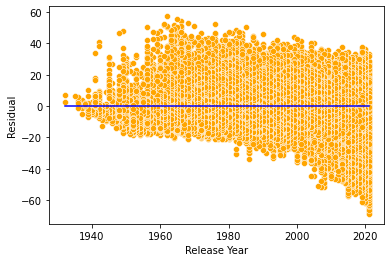

In [47]:
temp_data = spotify_data.drop(index = spotify_data[spotify_data['genres'] != 'pop'].index.to_list(), axis = 1)

sns.scatterplot(x = temp_data['release_year'], y = model7.resid, color='orange')
sns.lineplot(x = [temp_data['release_year'].min(),temp_data['release_year'].max()],y = [0,0],color = 'blue')
plt.xlabel('Release Year')
plt.ylabel('Residual')
plt.show()

Judging by the last graph, it appears that as `release_year` increases, the mean residual rises rapidly, then declines slowly, in a pattern somewhat resembling a log curve. Thus, we 

In [48]:
# predicting the popularity of a song based on a variety of categorical and numeric variables interacted with genres
spotify_data['log_release_year'] = spotify_data['release_year'].apply(lambda x:np.log(x))

ols_object8 = smf.ols(formula = 'track_popularity~log_release_year*genres+loudness*genres+artist_popularity*genres+energy*genres+artist_followers*genres+explicit*genres+danceability*genres+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = spotify_data)
model8 = ols_object8.fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     843.3
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:10:50   Log-Likelihood:            -9.5465e+05
No. Observations:              243190   AIC:                         1.910e+06
Df Residuals:                  242957   BIC:                         1.912e+06
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -1.035e+04    392.402    -26.388      0.000   -1.11e+04   -9585.785
genres[T.electronic]                       9162.0885    790.465     11.591      0.000    7612.797    1.07e+04
genres[T.folk]                              -43.0466    486.966     -0.088      0.930    -997.487     911.394
genres[T.hip hop]                          6855.5743    479.470     14.298      0.000    5915.825    7795.323
genres[T.hoerspiel]                        7685.5510    477.638     16.091      0.000    6749.394    8621.708
genres[T.jazz]                             3283.8299    406.998      8.068      0.000    2486.125    4081.535
genres[T.latin]                            2465.3259    517.396      4.765      0.000    1451.244    3479.408
genres[T.metal]                            6706.0655    819.486      8.183      0.000    5099.895    8312.236
genres[T.miscellaneous]                    2339.8953    396.857      5.896      0.000    1562.066    3117.725
genres[T.pop]                              2299.6434    395.770      5.811      0.000    1523.946    3075.341
genres[T.pop & rock]                       5042.5647    398.096     12.667      0.000    4262.307    5822.822
genres[T.rap]                              7871.1985    905.505      8.693      0.000    6096.433    9645.964
genres[T.rock]                             5788.4389    397.541     14.561      0.000    5009.270    6567.608
log_release_year                           1366.4855     51.715     26.423      0.000    1265.125    1467.846
log_release_year:genres[T.electronic]     -1207.2029    104.113    -11.595      0.000   -1411.261   -1003.145
log_release_year:genres[T.folk]               2.0781     64.175      0.032      0.974    -123.704     127.860
log_release_year:genres[T.hip hop]         -903.6166     63.111    -14.318      0.000   -1027.312    -779.921
log_release_year:genres[T.hoerspiel]      -1015.3389     63.010    -16.114      0.000   -1138.836    -891.842
log_release_year:genres[T.jazz]            -432.4507     53.639     -8.062      0.000    -537.581    -327.320
log_release_year:genres[T.latin]           -325.0602     68.210     -4.766      0.000    -458.750    -191.371
log_release_year:genres[T.metal]           -886.5279    107.910     -8.215      0.000   -1098.029    -675.027
log_release_year:genres[T.miscellaneous]   -309.6130     52.302     -5.920      0.000    -412.124    -207.102
log_release_year:genres[T.pop]             -305.3858     52.158     -5.855      0.000    -407.614    -203.158
log_release_year:genres[T.pop & rock]      -668.2926     52.463    -12.738      0.000    -771.118    -565.467
log_release_year:genres[T.rap]            -1034.3438    119.048     -8.688      0.000   -1267.674    -801.013
log

Converting to log has not worked for `release_year`, but has potential to work for a quadratic function

In [60]:
temp_data = spotify_data.drop(index = spotify_data[spotify_data['genres'] != 'pop'].index.to_list(), axis = 1)

ols_object9 = smf.ols(formula = 'track_popularity~genres*release_year**2+loudness*genres+artist_popularity*genres+energy*genres+artist_followers*genres+explicit*genres+danceability*genres+time_signature*genres+duration_ms*genres+tempo*genres+key*genres+mode*genres+valence*genres+speechiness*genres+liveness*genres+instrumentalness*genres+acousticness*genres', data = spotify_data)
model9 = ols_object9.fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       track_popularity   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     843.2
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:15:42   Log-Likelihood:            -9.5465e+05
No. Observations:              243190   AIC:                         1.910e+06
Df Residuals:                  242957   BIC:                         1.912e+06
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -1343.8968     51.809    -25.940      0.000   -1445.441   -1242.353
genres[T.electronic]                       1204.2116    103.872     11.593      0.000    1000.625    1407.798
genres[T.folk]                              -27.8724     64.209     -0.434      0.664    -153.720      97.975
genres[T.hip hop]                           901.0401     63.522     14.185      0.000     776.539    1025.541
genres[T.hoerspiel]                         990.8667     62.503     15.853      0.000     868.363    1113.370
genres[T.jazz]                              425.7171     53.773      7.917      0.000     320.323     531.111
genres[T.latin]                             315.6387     68.241      4.625      0.000     181.889     449.388
genres[T.metal]                             865.6679    107.510      8.052      0.000     654.951    1076.385
genres[T.miscellaneous]                     298.5791     52.398      5.698      0.000     195.880     401.278
genres[T.pop]                               288.0180     52.260      5.511      0.000     185.590     390.446
genres[T.pop & rock]                        636.7161     52.576     12.110      0.000     533.669     739.763
genres[T.rap]                              1056.5606    119.856      8.815      0.000     821.646    1291.475
genres[T.rock]                              750.5143     52.504     14.294      0.000     647.607     853.421
release_year                                  0.6877      0.026     26.427      0.000       0.637       0.739
genres[T.electronic]:release_year            -0.6089      0.052    -11.676      0.000      -0.711      -0.507
genres[T.folk]:release_year                   0.0003      0.032      0.010      0.992      -0.063       0.064
genres[T.hip hop]:release_year               -0.4568      0.032    -14.427      0.000      -0.519      -0.395
genres[T.hoerspiel]:release_year             -0.5114      0.032    -16.135      0.000      -0.573      -0.449
genres[T.jazz]:release_year                  -0.2144      0.027     -7.938      0.000      -0.267      -0.161
genres[T.latin]:release_year                 -0.1605      0.034     -4.668      0.000      -0.228      -0.093
genres[T.metal]:release_year                 -0.4490      0.054     -8.324      0.000      -0.555      -0.343
genres[T.miscellaneous]:release_year         -0.1560      0.026     -5.927      0.000      -0.208      -0.104
genres[T.pop]:release_year                   -0.1548      0.026     -5.898      0.000      -0.206      -0.103
genres[T.pop & rock]:release_year            -0.3369      0.026    -12.761      0.000      -0.389      -0.285
genres[T.rap]:release_year                   -0.5236      0.059     -8.807      0.000      -0.640      -0.407
gen

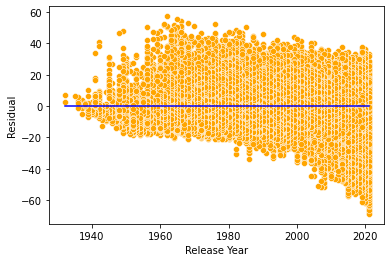

In [61]:
sns.scatterplot(x = temp_data['release_year'], y = model9.resid, color='orange')
sns.lineplot(x = [temp_data['release_year'].min(),temp_data['release_year'].max()],y = [0,0],color = 'blue')
plt.xlabel('Release Year')
plt.ylabel('Residual')
plt.show()

Neither transformations appear to have increased the R-squared value. Thus, `model7` continues to be the best and simplest model.